## SVM으로 분석하는 이미지

In [1]:
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split

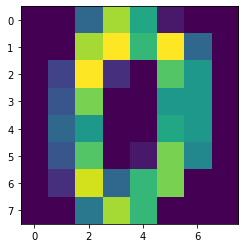

In [6]:
digits = datasets.load_digits()
plt.imshow(digits.images[0])

In [4]:
import numpy as np
a=np.array([2,3])
b=np.array([2,2,3])
tmp = [a,b]
tmp

[array([2, 3]), array([2, 2, 3])]

8


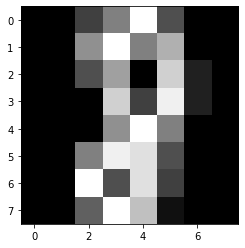

In [7]:
cnt=53
print(digits.target[cnt])
plt.imshow(digits.images[cnt],cmap='gray')


In [10]:
len(digits.target), len(digits.images)
np.shape(digits.target), np.shape(digits.images)

((1797,), (1797, 8, 8))

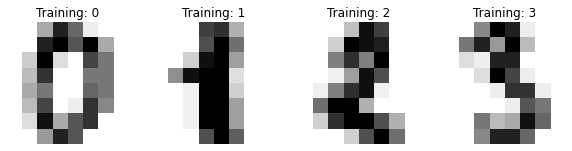

In [11]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [13]:
# 모든 머신러닝은 가로 세로를 이해하지 못함
# 가로 세로값을 가로로 모두 변경해야함
# 현재 8*8이라면 64개로 변경해서 x1,x2,x3...x64의 x변수를 제작함.
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1)) # (1797,8,8) 을 (1797,-1)로  즉 1797,64
data.shape

(1797, 64)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)
clf = svm.SVC(gamma=0.001)
clf.fit(X_train, y_train)
predicted = clf.predict(X_test)
predicted[:3] 

array([8, 8, 4])

In [16]:
X_test[0].reshape(8,8).shape

(8, 8)

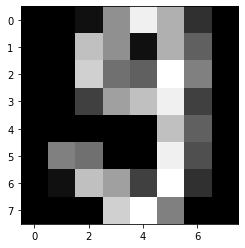

In [19]:
cnt=3
tmp = X_test[cnt].reshape(8,8)
plt.imshow(tmp,cmap='gray')

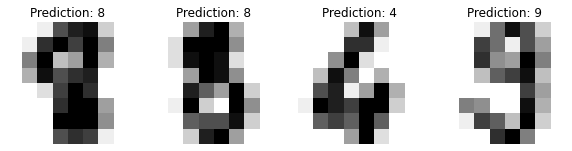

In [20]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, predicted):
    ax.set_axis_off()
    image = image.reshape(8, 8)     # 현재 64개의 x변수로 되어 있음. 이걸 가로*세로로 변경해서 보여줘야함
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

In [21]:
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, predicted)}\n")

Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

In [22]:
from PIL import Image
img=Image.open('c:/data/sample1.png')
img=img.convert('L')
img=img.resize((8,8))
arr=np.array(img)
print(arr.shape)

print(arr.max(), arr.min())

plt.imshow(arr,cmap='gray')
newX=arr.reshape(1,-1) # 64 x값으로 변환해서


# 예측모델을 작업한 SVM에 입열갛ㄴ 사진에 사용된 값과 같은 스케일링 필요
clf.predict(newX)


FileNotFoundError: ignored